In [2]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

 # 1. загрузить датасет
df = pd.read_csv("datasets/pr2/titanic.csv")

# 2. вывести информацию о датасете
df.info()

# 2. вывести первые 10 записей датасета
print(df.head(10))

# 2 выяснить, есть ли пропущенные значения в датасете
# если больше 0 в каком-то из столбцов - есть пропущенное значение
missing_values = df.isna().sum()

if missing_values.any():
    print("Пропущены значения", missing_values)

    # 2. Удаление строк с пропущенными значениями
    df = df.dropna()
    print("Пропущенные значения были удалены.")

    # 2. Или интерполяция (замена) пропущенных значений
    # df_interpolated = df.fillna(df.mean())
    # print("Пропущенные значения были интерполированы.")

# 2. предобработка данных для дальнейшей работы
# one-hot encoding столбцов Pclass (пассажирский класс) и Sex (пол),
# имеющих 3 и 2 различных значений соответственно
# df = pd.get_dummies(df, columns=["Pclass"])
# df.info()  # Pclass -> Pclass_1, Pclass_2, Pclass_3 | Sex -> Sex_female, Sex_male

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen 

In [3]:
# 3.

# (опционально - отфильтровать df по признаку)
# df = df[df["Survived"] == 0]
# df = df[df["Sex"] == "female"]

# Группировка данных по возрасту и подсчет количества людей в каждом возрасте
age_counts = (
    df["Age"].value_counts().sort_index()
)  # Группировка данных по возрасту и подсчет количества людей в каждом возрасте

fig = go.Figure(
    data=[
        go.Bar(
            # 3.1 По оси Х указать дату или название (возраст),
            # 3.2 по оси У указать количественный показатель (к-во людей возраста)
            x=age_counts.index,
            y=age_counts.values,
            marker=dict(
                # 3.2 Сделать так, чтобы столбец принимал цвет
                # в зависимости от значения показателя
                color=age_counts.values,
                coloraxis="coloraxis",
                # 3.3 Сделать так, чтобы границы каждого столбца были
                # выделены чёрной линией с толщиной равной 2.
                line=dict(color="black", width=0.33),
            ),
        )
    ]
)

fig.update_layout(
    title=dict(
        text="Age Distribution",
        font=dict(size=20),
        x=0.5,
        xanchor="center",  # 3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.
    ),
    xaxis=dict(
        title=dict(
            text="Name", font=dict(size=16)
        ),  # 3.5 Добавить подписи для осей X и Y с размером текста, равным 16.
        tickangle=315,  # 3.5. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.
        tickfont=dict(size=14),  # 3.6 Размер текста меток осей сделать равным 14.
        showgrid=True,
        gridwidth=2,
        gridcolor="ivory",
    ),
    yaxis=dict(
        title=dict(text="Age", font=dict(size=16)),
        tickfont=dict(size=14),  # 3.6 Размер текста меток осей сделать равным 14.
        showgrid=True,
        gridwidth=2,  # 3.8 Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2.
        gridcolor="ivory",
    ),
    coloraxis=dict(colorscale="Viridis"),
    width=1900,  # 3.7 Расположить график во всю ширину рабочей области
    # и присвоить высоту, равную 700 пикселей.
    height=700,
    margin=dict(l=0, r=0, t=50, b=0),  # 3.9 Убрать лишние отступы по краям.
)

In [4]:
# 4.
# Создаем интервалы как для гистограммы
bins = [0, 9, 19, 29, 39, 49, 59, 100]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-100"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_group_counts = df["AgeGroup"].value_counts().sort_index()

fig = go.Figure(
    data=[
        go.Pie(
            labels=age_group_counts.index,
            values=age_group_counts.values,
            marker=dict(line=dict(color="black", width=2)),  # Границы секций
            textinfo="label+percent",  # Информация о секциях: метка и процент
            insidetextorientation="radial",  # Ориентация текста внутри секций
        )
    ]
)

fig.update_layout(
    title=dict(
        text="Distribution of People by Age",
        font=dict(size=20),
        x=0.5,
        xanchor="center",
    ),
    width=1200,
    height=700,
    margin=dict(l=0, r=0, t=50, b=0),  # Убираем лишние отступы
)


/var/folders/_s/tz_zgp754nd9vmsh7m_ny0p1b7bxbx/T/ipykernel_85163/1715969848.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/_s/tz_zgp754nd9vmsh7m_ny0p1b7bxbx/T/ipykernel_85163/1715969848.py:30: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/_s/tz_zgp754nd9vmsh7m_ny0p1b7bxbx/T/ipykernel_85163/1715969848.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



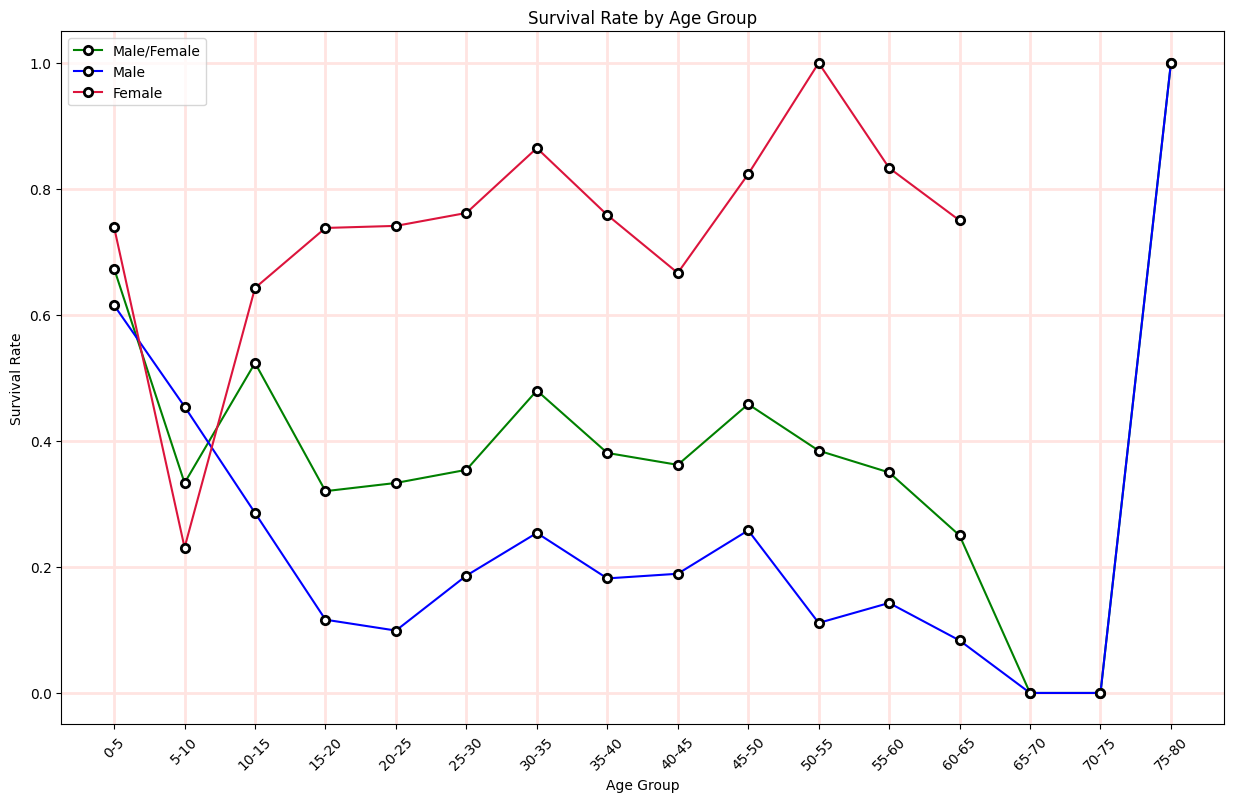

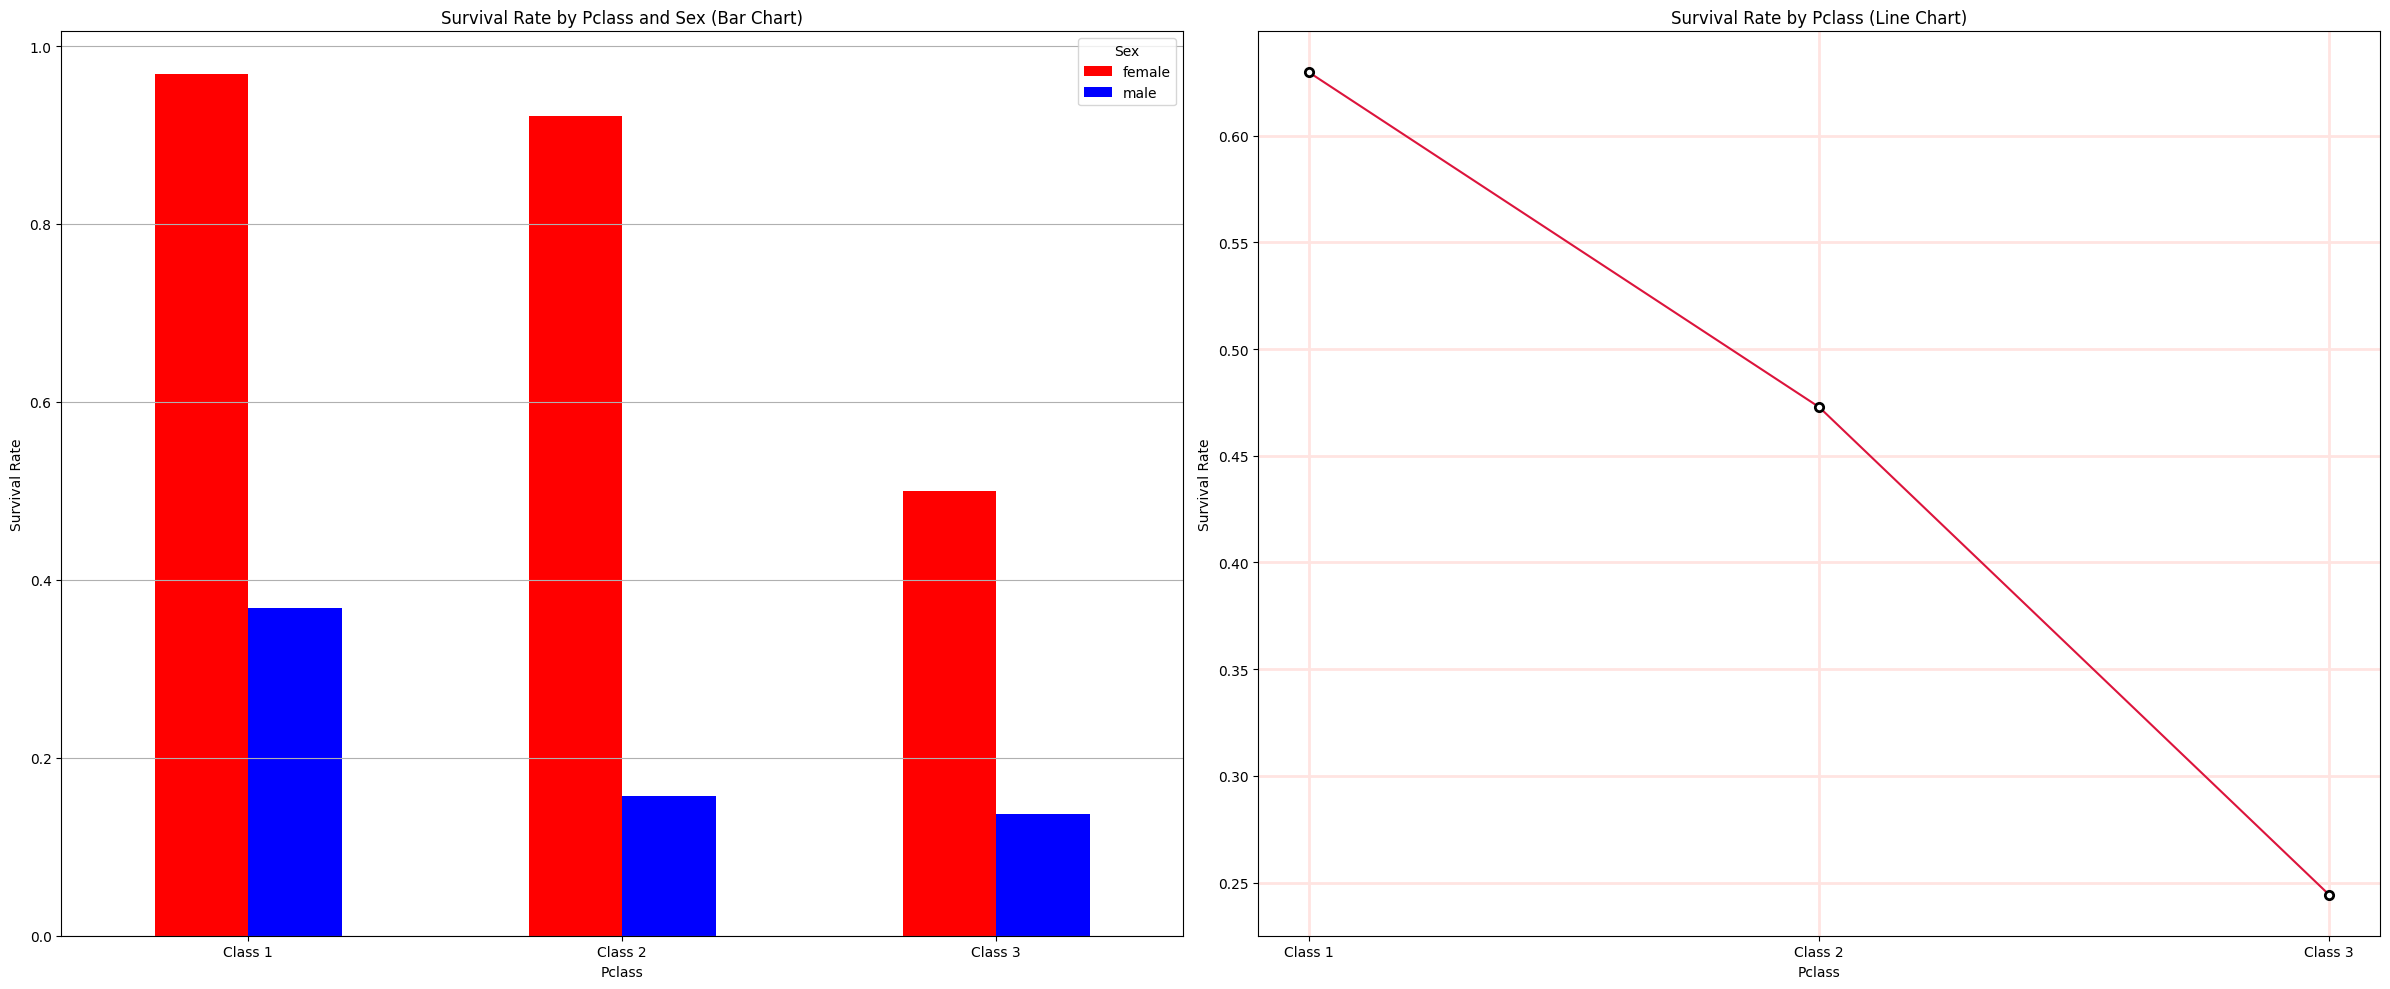

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px


df = pd.read_csv("datasets/pr2/titanic.csv")

missing_values = df.isna().sum()

if missing_values.any():
    df = df.dropna()

# 5.
# Определение зависимости между 'Survived' и другими параметрами
age_bins = np.arange(0, 81, 5)
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins)

df_male = df[df["Sex"] == "male"]
df_female = df[df["Sex"] == "female"]

age_group_survival = df.groupby("AgeGroup")["Survived"].mean()
age_group_survival_male = df_male.groupby("AgeGroup")["Survived"].mean()
age_group_survival_female = df_female.groupby("AgeGroup")["Survived"].mean()

# возрастные интервалы (0-5,...)
age_group_labels = [
    f"{int(b.left)}-{int(b.right)}" for b in age_group_survival.index.categories
]

plt.figure(figsize=(15, 9))
plt.plot(
    age_group_labels,
    age_group_survival,
    marker="o",
    linestyle="-",
    color="g",
    label="Male/Female",
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black",
)

plt.plot(
    age_group_labels,
    age_group_survival_male,
    marker="o",
    linestyle="-",
    color="b",
    label="Male",
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black",
)

plt.plot(
    age_group_labels,
    age_group_survival_female,
    marker="o",
    linestyle="-",
    color="crimson",
    label="Female",
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black",
)

plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linewidth=2, color="mistyrose")  # 5.2 настройка сетки
plt.show()

# средняя выживаемость по пассажирским классам по полам
pclass_sex_survival = df.groupby(["Pclass", "Sex"])["Survived"].mean().unstack()

fig, ax = plt.subplots(1, 2, figsize=(24, 10))

pclass_sex_survival.plot(kind="bar", ax=ax[0], color=["red", "blue"])
ax[0].set_xlabel("Pclass")
ax[0].set_ylabel("Survival Rate")
ax[0].set_xticklabels(["Class 1", "Class 2", "Class 3"], rotation=0)
ax[0].set_title("Survival Rate by Pclass and Sex (Bar Chart)")
ax[0].grid(axis="y")

pclass_survival = df.groupby("Pclass")["Survived"].mean()
ax[1].plot(
    pclass_survival.index,
    pclass_survival.values,
    marker="o",
    linestyle="-",
    color="crimson",
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black",
)
ax[1].set_xlabel("Pclass")
ax[1].set_ylabel("Survival Rate")
ax[1].set_title("Survival Rate by Pclass (Line Chart)")
ax[1].set_xticks([1, 2, 3])
ax[1].set_xticklabels(["Class 1", "Class 2", "Class 3"], rotation=0)
ax[1].grid(True, linewidth=2, color="mistyrose")

# Показываем графики
plt.tight_layout()
plt.show()

t-SNE with perplexity=5 took 0.88 seconds


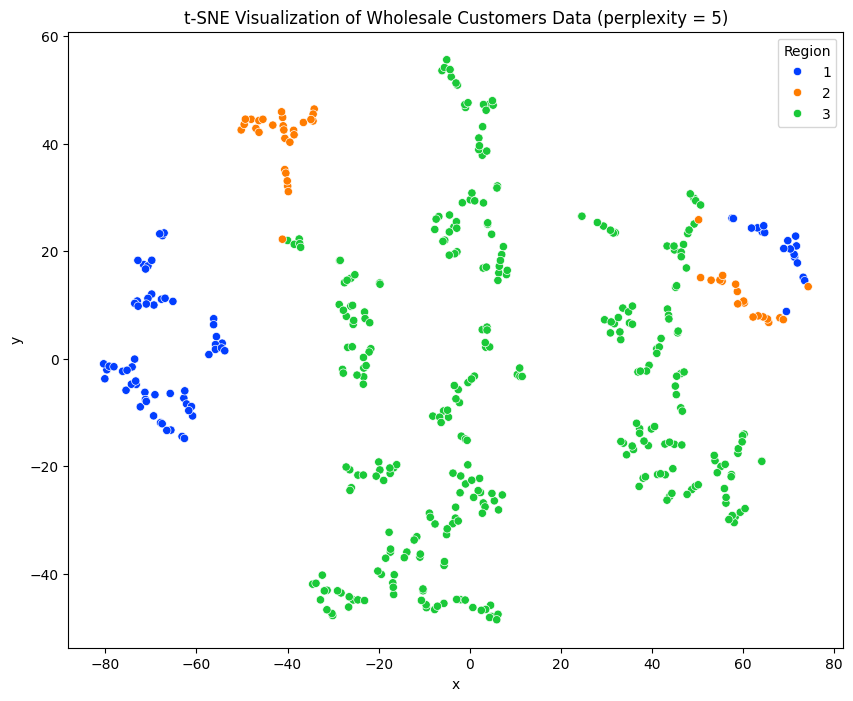

t-SNE with perplexity=25 took 0.98 seconds


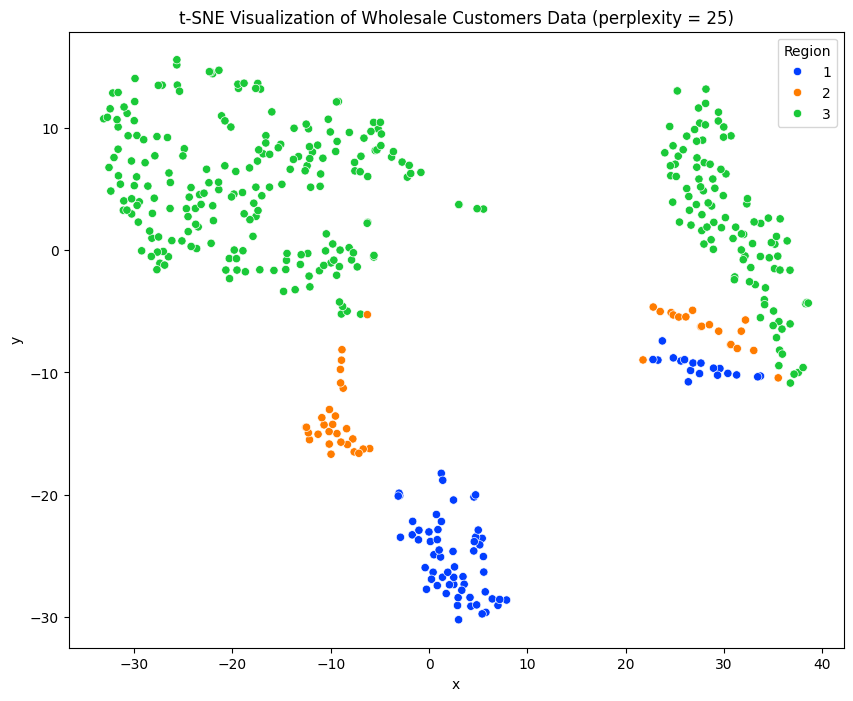

t-SNE with perplexity=50 took 1.08 seconds


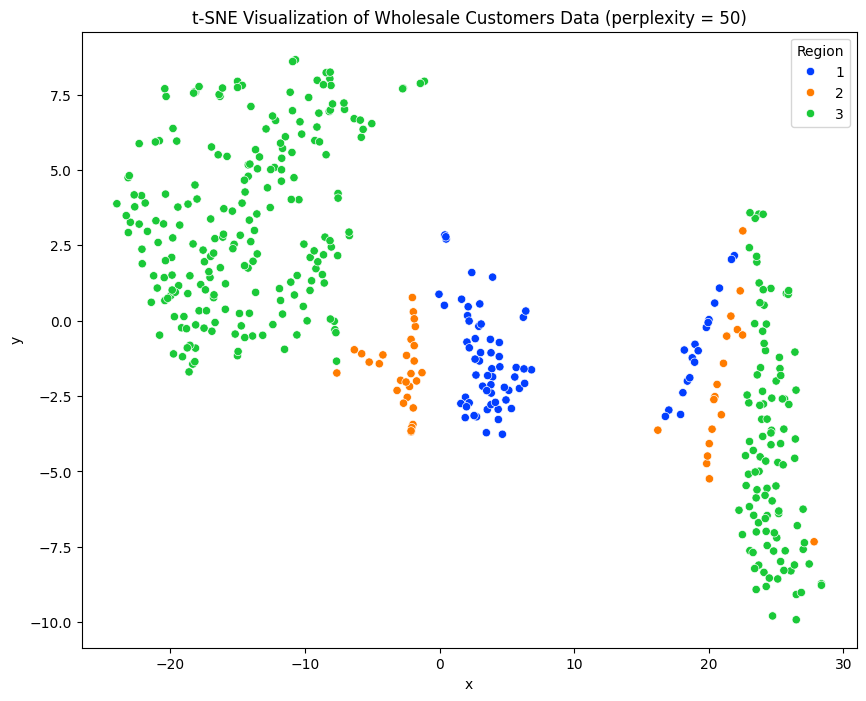

In [6]:
import time

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# 6. Выполнить визуализацию многомерных данных, используя t-SNE.
# Рассмотреть результаты визуализации для разных значений перплексии.
data = pd.read_csv("datasets/pr2/Wholesale customers data.csv")

# исключение категориальных признаков
data.drop(["Region", "Channel"], axis=1)

# предобработка данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

for perplexity in [5, 25, 50]:
    start_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    tsne_results = tsne.fit_transform(scaled_data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"t-SNE with perplexity={perplexity} took {elapsed_time:.2f} seconds")
    d = data.copy()
    d["x"] = tsne_results[:, 0]
    d["y"] = tsne_results[:, 1]

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x="x", y="y", hue=data["Region"], data=d, palette="bright")
    # plt.scatter(tsne_results 0], tsne_results[:, 1])
    plt.title(
        f"t-SNE Visualization of Wholesale Customers Data (perplexity = {perplexity})"
    )
    plt.show()

UMAP with n_neighbors=5 and min_dist=0.1 took 0.67 seconds
UMAP with n_neighbors=25 and min_dist=0.1 took 0.78 seconds
UMAP with n_neighbors=50 and min_dist=0.1 took 0.88 seconds
UMAP with n_neighbors=5 and min_dist=0.5 took 0.57 seconds


/Users/bratushkadan/projects/university/python/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



UMAP with n_neighbors=25 and min_dist=0.5 took 0.92 seconds
UMAP with n_neighbors=50 and min_dist=0.5 took 0.99 seconds


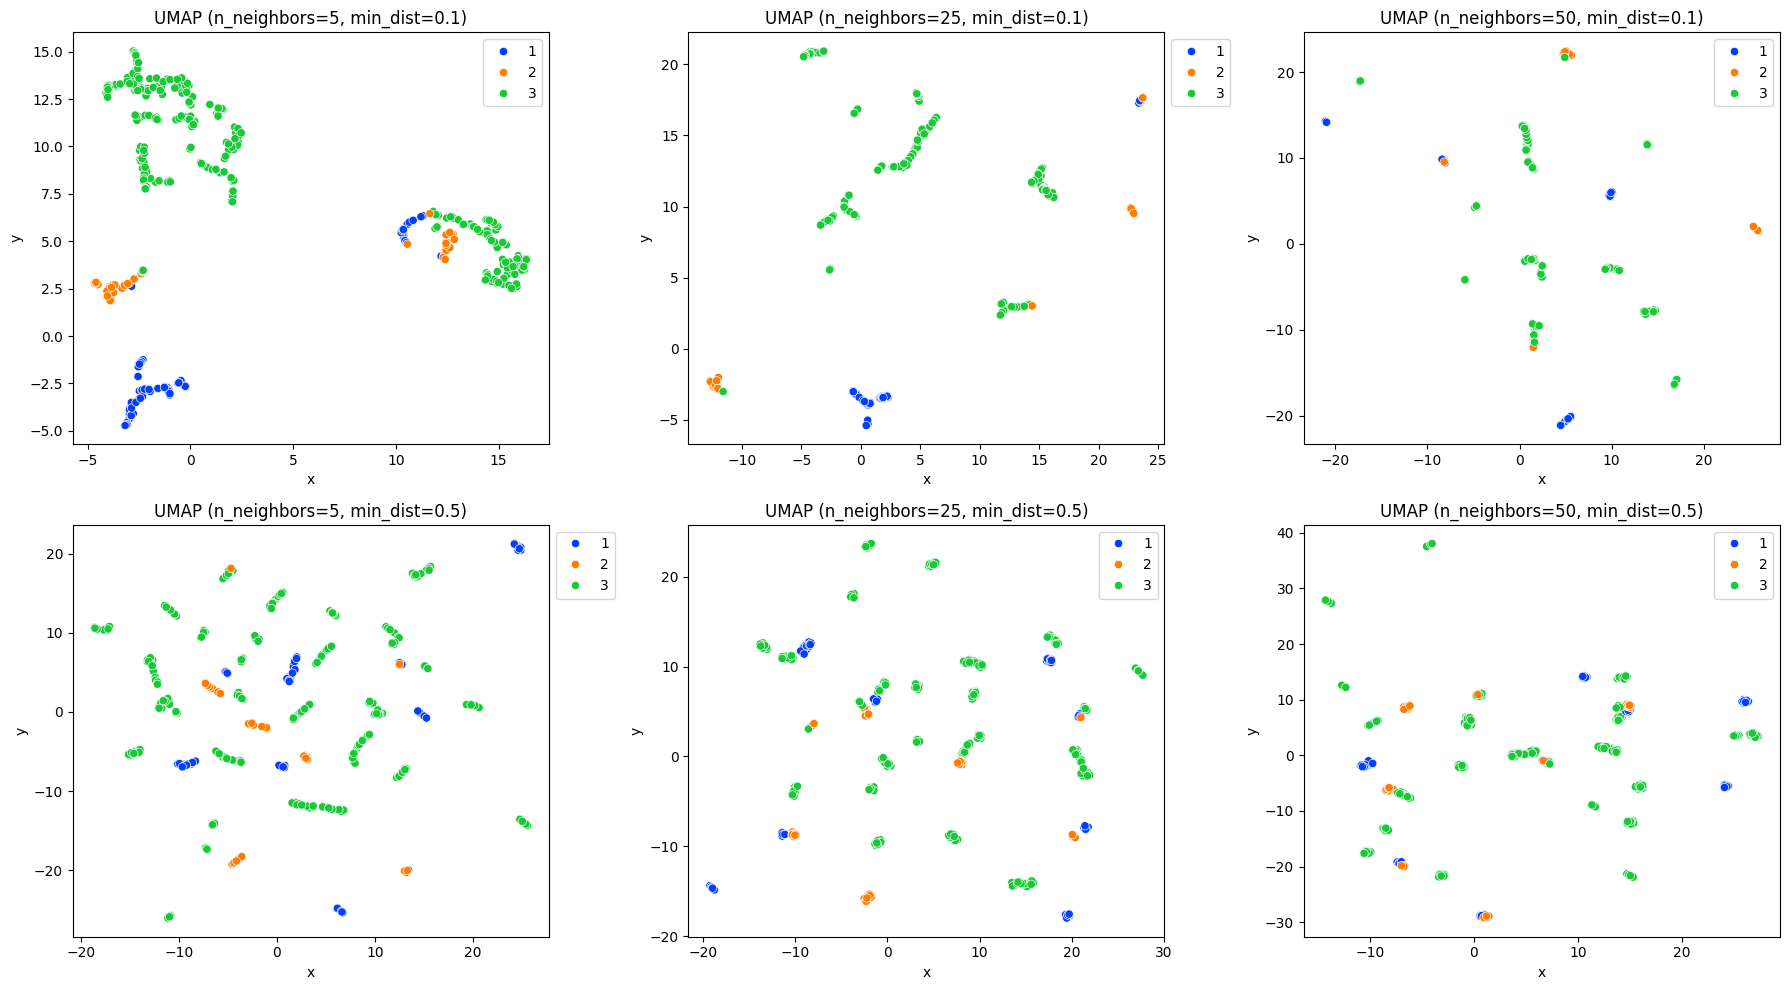

In [7]:
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap


# 7. Выполнить визуализацию многомерных данных, используя UMAP
# с различными параметрами n_neighbors и min_dist
data = pd.read_csv("datasets/pr2/Wholesale customers data.csv")

# исключение категориальных признаков
region_labels = data["Region"]
data.drop(["Region", "Channel"], axis=1)

# предобработка данных
scaler = StandardScaler()
d = scaler.fit_transform(data)

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

n_neigh = [5, 25, 50]
min_dist = [0.1, 0.5]

# разгогреть umap для точных замеров
reducer = umap.UMAP(n_neighbors=3, min_dist=0.08, random_state=33, n_jobs=1)
umap_results = reducer.fit_transform(d)

for i, md in enumerate(min_dist):
    for j, nn in enumerate(n_neigh):
        # Измерение времени выполнения UMAP
        start_time = time.time()

        # Применение UMAP
        reducer = umap.UMAP(n_neighbors=nn, min_dist=md, random_state=33, n_jobs=1)
        umap_results = reducer.fit_transform(d)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(
            f"UMAP with n_neighbors={nn} and min_dist={md} took {elapsed_time:.2f} seconds"
        )

        # Добавление результатов UMAP в данные
        d = pd.DataFrame(umap_results, columns=["x", "y"])
        d["Region"] = region_labels

        # Визуализация с окраской точек по регионам
        sns.scatterplot(
            x="x", y="y", hue="Region", palette="bright", data=d, ax=axs[i, j]
        )
        axs[i, j].set_title(f"UMAP (n_neighbors={nn}, min_dist={md})")

        # Увеличение размера легенды
        legend = axs[i, j].legend()
        legend.set_bbox_to_anchor((1, 1))

plt.tight_layout()
plt.show()